In [1]:
import torch 

In [2]:
 vector = torch.tensor([[7, 7], [3, 4]])
 vector

tensor([[7, 7],
        [3, 4]])

In [3]:
vector.shape

torch.Size([2, 2])

In [4]:
matrix = torch.tensor([[[2 , 3],
                        [3 , 4]],
                       [[5, 6],
                        [7, 8]]])
matrix

tensor([[[2, 3],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [5]:
matrix.shape

torch.Size([2, 2, 2])

In [6]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

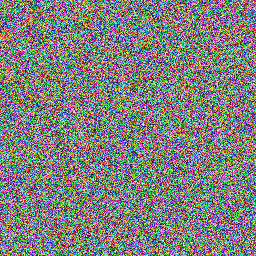

In [7]:
#convert random tensor to an image
tensor = torch. rand(3,256,256)
transform = T.ToPILImage()
img = transform(tensor)
img

In [8]:
tensorA = torch.tensor([[1, 2, 4],
                        [2, 3, 4]])
tensorA 

tensor([[1, 2, 4],
        [2, 3, 4]])

In [9]:
tensorA.T

tensor([[1, 2],
        [2, 3],
        [4, 4]])

In [10]:
tensorA

tensor([[1, 2, 4],
        [2, 3, 4]])

In [11]:
tensorA.max()

tensor(4)

In [12]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [13]:
import torch 

In [14]:
torch.manual_seed(seed = 0)
tensor = torch.randn(7, 7)

In [15]:
tensor

tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160],
        [-2.1152,  0.3223, -1.2633,  0.3500,  0.3081,  0.1198,  1.2377],
        [ 1.1168, -0.2473, -1.3527, -1.6959,  0.5667,  0.7935,  0.5988],
        [-1.5551, -0.3414,  1.8530,  0.7502, -0.5855, -0.1734,  0.1835],
        [ 1.3894,  1.5863,  0.9463, -0.8437, -0.6136,  0.8728,  1.0554],
        [ 0.1778, -0.2303, -0.3918,  0.5433, -0.3952,  0.2055,  0.7440],
        [ 1.5210,  3.4105, -1.5312, -1.2341,  1.8197, -0.5515, -1.3253]])

In [16]:
torch.manual_seed(seed = 0)
tensor2 = torch.randn(1, 7)

In [17]:
torch.matmul(tensor, tensor2.T)

tensor([[-3.1132],
        [-0.4052],
        [ 2.2938],
        [-4.9556],
        [-0.9954],
        [ 1.9452],
        [ 2.2410]])

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.manual_seed(seed = 1234)
tensor1 = torch.randn(7, 7).to(device)
tensor2 = torch.randn(1, 7).to(device)

In [19]:
tensor1, tensor2

(tensor([[-1.3527, -1.6959,  0.5667,  0.7935,  0.5988, -1.5551, -0.3414],
         [ 1.8530,  0.7502, -0.5855, -0.1734,  0.1835,  1.3894,  1.5863],
         [ 0.9463, -0.8437, -0.6136,  0.0316, -0.4927,  0.2484,  0.4397],
         [ 0.1124,  0.6408,  0.4412, -0.1023,  0.7924, -0.2897,  0.0525],
         [ 0.5229,  2.3022, -1.4689, -1.5867, -0.6731,  0.9200,  1.1108],
         [ 1.2899, -1.4782,  2.5672, -0.4731,  0.3356,  1.5091, -0.5497],
         [-0.4798, -0.4997, -1.0670,  1.1149, -0.1407,  0.8058,  0.3276]]),
 tensor([[ 0.8380, -0.1330, -0.0469, -0.2802,  0.5401, -0.1464, -0.1574]]))

In [20]:
torch.matmul(tensor1, tensor2.T)

tensor([[-0.5522],
        [ 1.1752],
        [ 0.5535],
        [ 0.4791],
        [-0.0275],
        [ 1.3365],
        [-0.8435]])

In [21]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [22]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [23]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

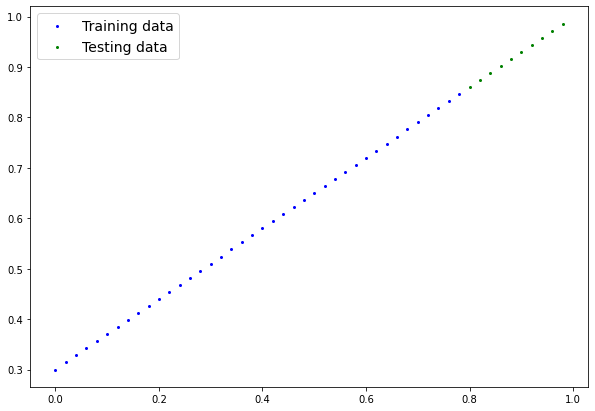

In [24]:
plot_predictions()

In [25]:
import torch
from torch import nn
class linear_regression_model(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x : torch.tensor):
    return self.weight * x + self.bias


In [26]:
torch.manual_seed(seed = 42)
model1 = linear_regression_model()
p = list(model1.parameters())
p

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
# make some random predictions with y_test
y_pred = model1(y_test)
y_pred

tensor([[0.4184],
        [0.4231],
        [0.4278],
        [0.4325],
        [0.4372],
        [0.4419],
        [0.4466],
        [0.4514],
        [0.4561],
        [0.4608]], grad_fn=<AddBackward0>)

In [28]:
with torch.inference_mode():
  y_pred1 = model1(y_test)
y_pred1

tensor([[0.4184],
        [0.4231],
        [0.4278],
        [0.4325],
        [0.4372],
        [0.4419],
        [0.4466],
        [0.4514],
        [0.4561],
        [0.4608]])

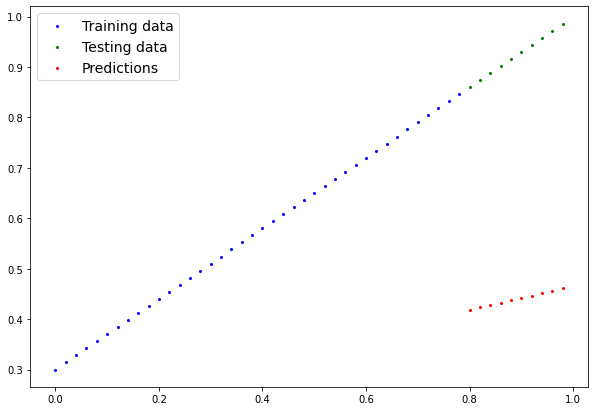

In [29]:
plot_predictions(predictions = y_pred1)

In [30]:
# training a model with pytorch

i need a omptimizer and a loss function to build a training loop

In [31]:
loss_f = nn.L1Loss()
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)

In [ ]:
epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model1.train()

  y_pred = model1(X_train)

  loss = loss_f(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model1.eval()

  with torch.inference_mode():

      test_pred = model1(X_test)

      test_loss = loss_f(test_pred, y_test.type(torch.float))

      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


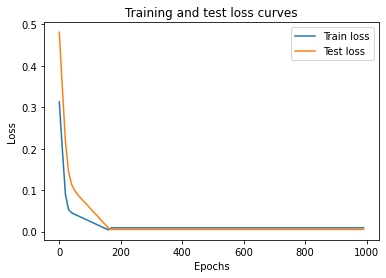

In [33]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();